In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nbimporter
from IMP import ImportData
from IMP import Reflection
import GTM.Permittivities as mat
from scipy.constants import c, pi
from scipy.optimize import curve_fit
from lmfit import Model

In [2]:
wl1, refl1, rr1 = ImportData.Data1()
wl2, refl2, rr2 = ImportData.Data2()
wl3, refl3, rr3 = ImportData.Data3()

In [3]:
LitModel = Reflection.ReflectionRatio
LorentzRefl = Reflection.ReflectionRatioLorentz

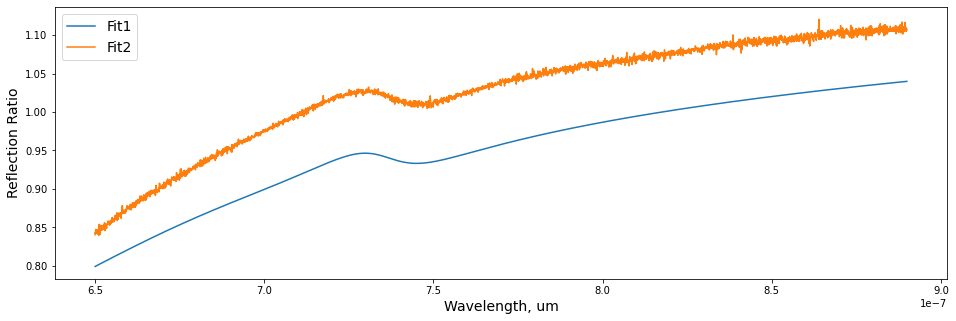

In [4]:
L = wl3[:4000]*1e-9

M3 = LorentzRefl(c/L, 22, 18e14, 2.56e15, 1.0e14) 
#Lplot2 = LorentzRefl(c/L, 4, 10.3e14, 2.57e15, 1e14) 

plt.figure(figsize = (16, 5))   
line1 = plt.plot(L, M3)
#line1 = plt.plot(L, Lplot2)
plt.plot(L, rr3[:4000])

plt.xlabel("Wavelength, um", fontsize=14)
plt.ylabel("Reflection Ratio", fontsize=14)
plt.legend(["Fit1", "Fit2", "77K experiment"], fontsize=14)

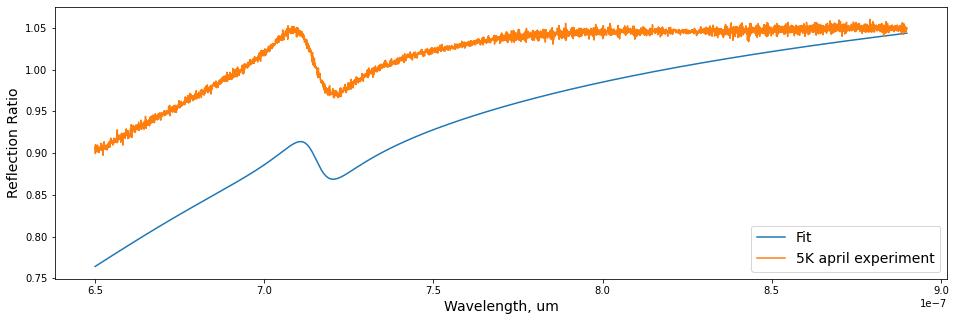

In [5]:
# L = wl2[:4000]*1e-9

M2 = LorentzRefl(c/L, 25, 13e14, 2.634e15, 0.45e14) 

plt.figure(figsize = (16, 5))   
line1 = plt.plot(L, M2)
plt.plot(L, rr2[:4000])

plt.xlabel("Wavelength, um", fontsize=14)
plt.ylabel("Reflection Ratio", fontsize=14)
plt.legend(["Fit", "5K april experiment"], fontsize=14)

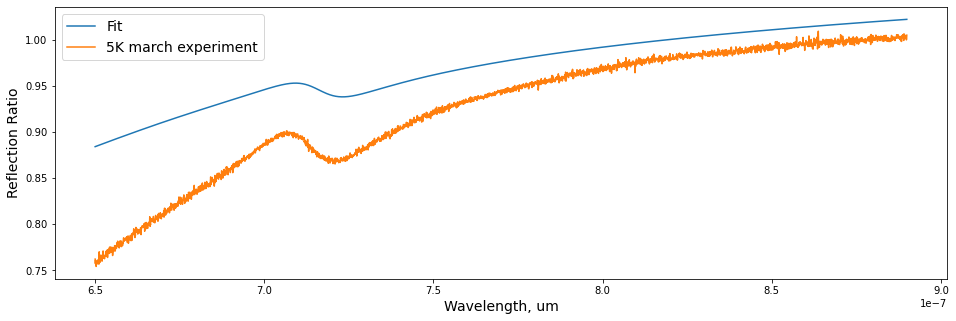

In [6]:
L = wl1[:4000]*1e-9

M1 = LorentzRefl(c/L, 13, 12e14, 2.63e15, 0.8e14) 

plt.figure(figsize = (16, 5))   
line1 = plt.plot(L, M1)
plt.plot(L, rr1[:4000])

plt.xlabel("Wavelength, um", fontsize=14)
plt.ylabel("Reflection Ratio", fontsize=14)
plt.legend(["Fit", "5K march experiment"], fontsize=14)

In [7]:

popt1, _ = curve_fit(LorentzRefl, c/L, rr1[:4000], bounds=([1, 10e14, 2.2e15, 0.3e14], [50, 30e14, 2.7e15, 3e14]))
print(popt1)

[2.51513132e+01 1.27854609e+15 2.64109819e+15 5.10887877e+13]


In [8]:
gmodel = Model(LorentzRefl)
params = gmodel.make_params(e_inf = 29, wp = 20e14, w0  = 26.4e14, y = 0.9e14)
params
params['e_inf'].min = 1
params['e_inf'].max = 50
params['wp'].min = 10e14
params['wp'].max = 30e14
params['w0'].min = 26.38e14
params['w0'].max = 26.42e14
params['y'].min = 0.3e14
params['y'].max = 3e14
params
result1 = gmodel.fit(rr1[:4000], params, f=c/L)
result1.params

name,value,standard error,relative error,initial value,min,max,vary
e_inf,25.1516014,0.09538126,(0.38%),29,1.00000000,50.0000000,True
wp,1.2787e+15,3.5309e+13,(2.76%),2000000000000000.0,1.0000e+15,3.0000e+15,True
w0,2.6411e+15,8.9443e+11,(0.03%),2640000000000000.0,2.6380e+15,2.6420e+15,True
y,5.1108e+13,3.1295e+12,(6.12%),90000000000000.0,3.0000e+13,3.0000e+14,True


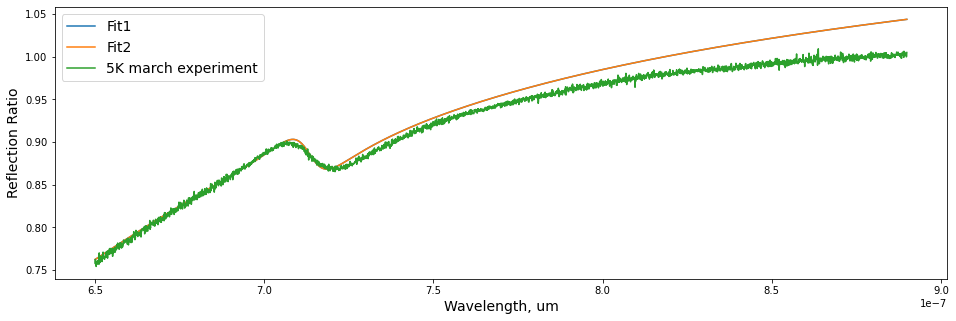

In [9]:
L = wl3[:4000]*1e-9

Lplot1 = LorentzRefl(c/L, popt1[0], popt1[1], popt1[2], popt1[3])  
Lplot2 = LorentzRefl(c/L, result1.params['e_inf'].value, result1.params['wp'].value, result1.params['w0'].value, result1.params['y'].value) 

plt.figure(figsize = (16, 5))   
line1 = plt.plot(L, Lplot1)
line1 = plt.plot(L, Lplot2)
plt.plot(L, rr1[:4000])

plt.xlabel("Wavelength, um", fontsize=14)
plt.ylabel("Reflection Ratio", fontsize=14)
plt.legend(["Fit1", "Fit2", "5K march experiment"], fontsize=14)

Text(0, 0.5, 'Reflection Ratio')

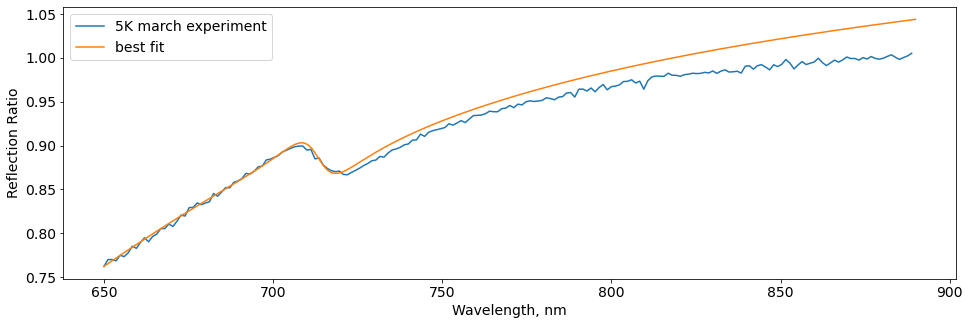

In [17]:
plt.rcParams['font.size'] = '14'
plt.rcParams['figure.figsize'] = (16, 5)
plt.plot(L[::20]*1e9, rr1[:4000:20], label='5K march experiment')
plt.plot(L*1e9, result1.best_fit, '-', label='best fit')
# plt.plot(L*1e9, result1.init_fit, '--', label='initial fit')
plt.legend()
plt.xlabel("Wavelength, nm", fontsize=14)
plt.ylabel("Reflection Ratio", fontsize=14)

In [11]:
BOUNDS = [[1, 10e14, 2.2e15, 0.3e14], [50, 30e14, 2.7e15, 3e14]]
E_INF  = np.linspace(BOUNDS[0][0], BOUNDS[1][0], 10)
Wp = np.linspace(BOUNDS[0][1], BOUNDS[1][1], 10)
W0 = np.linspace(BOUNDS[0][2], BOUNDS[1][2], 10)
Y = np.linspace(BOUNDS[0][3], BOUNDS[1][3], 10)

Lshort1 = wl1[:4000:20]*1e-9
rr1short =  rr1[:4000:20]
k_min1 = (M1[::20]-rr1short)@(M1[::20]-rr1short)
print(k_min1)
BEST_FITs1 = np.array([[29, 20e14, 2.64e15, 0.9e14]])
R_BEST1 = np.array([M1[::20]])

for i, e_inf in enumerate(E_INF):
    for j, wp in enumerate(Wp):
        for k, w0 in enumerate(W0):
            for l, y in enumerate(Y):
                M_iter = LorentzRefl(c/Lshort1, e_inf, wp, w0, y) 
                k_iter = (M_iter-rr1short)@(M_iter-rr1short)
                if k_iter <= k_min1:
                    BEST_FITs1 = np.vstack((BEST_FITs1, [[e_inf, wp, w0, y]]))
                    R_BEST1 = np.vstack((R_BEST1, [M_iter]))
                    k_min1 = k_iter
print(k_min1)    

0.5894667964835855
0.08830943064078427


Text(0, 0.5, 'Reflection Ratio')

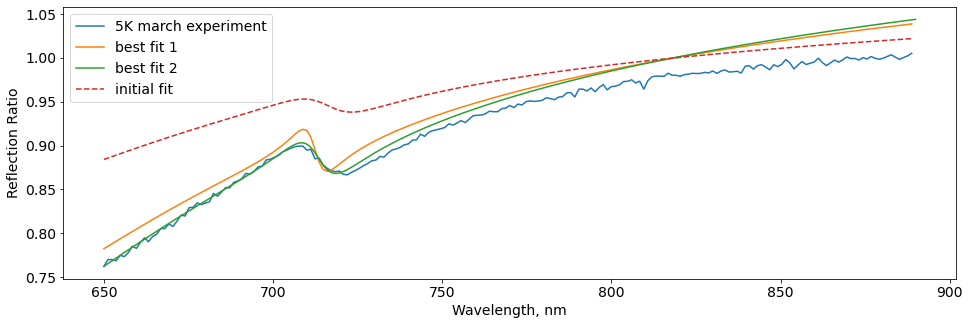

In [12]:
Lshort = wl3[:4000:20]*1e-9
plt.figure(figsize = (16, 5))   
plt.plot(Lshort*1e9, rr1[:4000:20], label='5K march experiment')
plt.plot(Lshort*1e9, R_BEST1[-1], '-', label='best fit 1')
plt.plot(L*1e9, result1.best_fit, '-', label='best fit 2')
plt.plot(Lshort*1e9, R_BEST1[0], '--', label='initial fit')
plt.legend()
plt.xlabel("Wavelength, nm", fontsize=14)
plt.ylabel("Reflection Ratio", fontsize=14)

In [13]:
BOUNDS = [[1, 10e14, 2.2e15, 0.3e14], [50, 30e14, 2.7e15, 3e14]]
E_INF  = np.linspace(BOUNDS[0][0], BOUNDS[1][0], 10)
Wp = np.linspace(BOUNDS[0][1], BOUNDS[1][1], 10)
W0 = np.linspace(BOUNDS[0][2], BOUNDS[1][2], 10)
Y = np.linspace(BOUNDS[0][3], BOUNDS[1][3], 10)

Lshort2 = wl2[:4000:20]*1e-9
rr2short =  rr2[:4000:20]
k_min2 = (M2[::20]-rr2short)@(M2[::20]-rr2short)
print(k_min2)
BEST_FITs2 = np.array([[1, 15.5e14, 2.634e15, 0.45e14]])
R_BEST2 = np.array([M2[::20]])

for i, e_inf in enumerate(E_INF):
    for j, wp in enumerate(Wp):
        for k, w0 in enumerate(W0):
            for l, y in enumerate(Y):
                M_iter = LorentzRefl(c/Lshort2, e_inf, wp, w0, y) 
                k_iter = (M_iter-rr2short)@(M_iter-rr2short)
                if k_iter <= k_min2:
                    BEST_FITs2 = np.vstack((BEST_FITs2, [[e_inf, wp, w0, y]]))
                    R_BEST2 = np.vstack((R_BEST2, [M_iter]))
                    k_min2 = k_iter
print(k_min2)


1.6071479848308081
0.1122153240989027


Text(0, 0.5, 'Reflection Ratio')

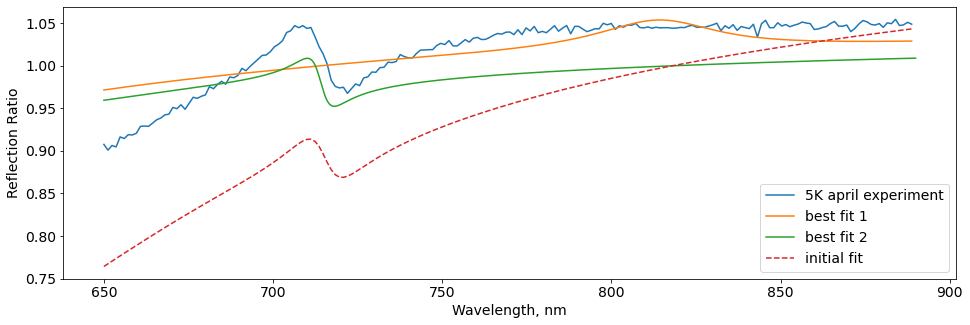

In [14]:
result2 = gmodel.fit(rr2[:4000], params, f=c/L)
plt.figure(figsize = (16, 5))   
plt.plot(Lshort*1e9, rr2[:4000:20], label='5K april experiment')
plt.plot(Lshort*1e9, R_BEST2[-1], '-', label='best fit 1')
plt.plot(L*1e9, result2.best_fit, '-', label='best fit 2')
plt.plot(Lshort*1e9, R_BEST2[0], '--', label='initial fit')
plt.legend()
plt.xlabel("Wavelength, nm", fontsize=14)
plt.ylabel("Reflection Ratio", fontsize=14)

In [15]:
BOUNDS = [[1, 10e14, 2.2e15, 0.3e14], [50, 30e14, 2.7e15, 3e14]]
E_INF  = np.linspace(BOUNDS[0][0], BOUNDS[1][0], 10)
Wp = np.linspace(BOUNDS[0][1], BOUNDS[1][1], 10)
W0 = np.linspace(BOUNDS[0][2], BOUNDS[1][2], 10)
Y = np.linspace(BOUNDS[0][3], BOUNDS[1][3], 10)

Lshort3 = wl3[:4000:20]*1e-9
rr3short =  rr3[:4000:20]
k_min3 = (M3[::20]-rr3short)@(M3[::20]-rr3short)
print(k_min3)
BEST_FITs3 = np.array([[25, 20e14, 2.56e15, 0.94e14]])
R_BEST3 = np.array([M3[::20]])

for i, e_inf in enumerate(E_INF):
    for j, wp in enumerate(Wp):
        for k, w0 in enumerate(W0):
            for l, y in enumerate(Y):
                M_iter = LorentzRefl(c/Lshort2, e_inf, wp, w0, y) 
                k_iter = (M_iter-rr3short)@(M_iter-rr3short)
                if k_iter <= k_min3:
                    BEST_FITs3 = np.vstack((BEST_FITs3, [[e_inf, wp, w0, y]]))
                    R_BEST3 = np.vstack((R_BEST3, [M_iter]))
                    k_min3 = k_iter
print(k_min3)

1.0845129064797328
0.29419304367874416


Text(0, 0.5, 'Reflection Ratio')

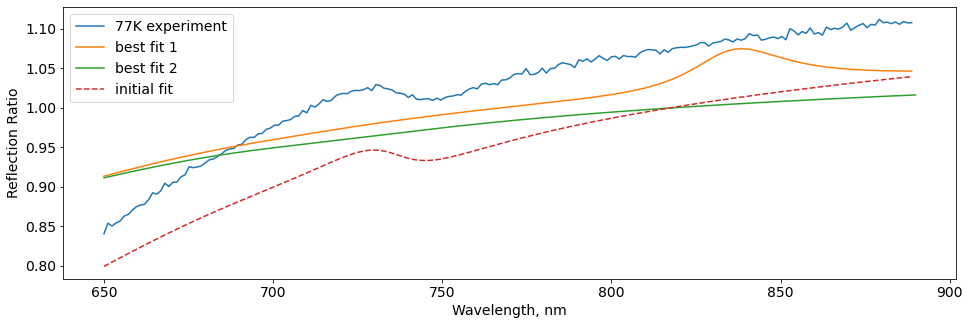

In [16]:
result3 = gmodel.fit(rr3[:4000], params, f=c/L)
plt.figure(figsize = (16, 5))   
plt.plot(Lshort3*1e9, rr3[:4000:20], label='77K experiment')
plt.plot(Lshort3*1e9, R_BEST3[-1], '-', label='best fit 1')
plt.plot(L*1e9, result3.best_fit, '-', label='best fit 2')
plt.plot(Lshort*1e9, R_BEST3[0], '--', label='initial fit')
plt.legend()
plt.xlabel("Wavelength, nm", fontsize=14)
plt.ylabel("Reflection Ratio", fontsize=14)